# THEME BASED PROJECT
### Apoorva 1602-17-737-008
### Junaid 1602-17-737-020
### Smaran 1602-17-737-035

Here we are importing the libraries and respective classes that we need for the execution of this ML algorithm. And also we are setting the path to the dataset that is stored in the /data section. We are also declaring a few values and parameters that we are going to be using in this code.



In [20]:
import math
import matplotlib
import numpy as np
import pandas as pd
import seaborn as sns
import time

from IPython.display import clear_output
from datetime import date, datetime, time, timedelta
from matplotlib import pyplot as plt
from pylab import rcParams
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from tqdm import tqdm_notebook

%matplotlib inline
stk_path = '.\\MapReduce\\Test2\\daily\\output\\Daily\\part-r-00000'
test_size = 0.2                 
cv_size = 0.2                   
Nmax = 30              
                                
fontsize = 14
ticklabelsize = 14


In [21]:
def get_preds_lin_reg(df, target_col, N, pred_min, offset):
    regr = LinearRegression(fit_intercept=True)

    pred_list = []

    for i in range(offset, len(df['close'])):
        X_train = np.array(range(len(df['close'][i-N:i])))
        y_train = np.array(df['close'][i-N:i]) 
        X_train = X_train.reshape(-1, 1)
        y_train = y_train.reshape(-1, 1)
        regr.fit(X_train, y_train)          
        pred = regr.predict(np.array(N).reshape(1,-1))
    
        pred_list.append(pred[0][0]) 
        
    pred_list = np.array(pred_list)
    pred_list[pred_list < pred_min] = pred_min
        
    return pred_list

def get_mape(y_true, y_pred): 
    
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [22]:
df = pd.read_csv(stk_path, sep = "\t")


In [23]:
grouped = df.groupby(df.stock_name)
names = df['stock_name'].unique().tolist()
for item in names:
    print(item)

A
AAL
AAP
AAPL
ABBV
ABC
ABT
ACN
ADBE
ADI
ADM
ADP
ADS
ADSK
AEE
AEP
AES
AET
AFL
AGN
AIG
AIV
AIZ
AJG
AKAM
ALB
ALK
ALL
ALLE
ALXN
AMAT
AME
AMG
AMGN
AMP
AMT
AMZN
AN
ANTM
AON
APA
APC
APD
APH
ARNC
ATVI
AVB
AVGO
AVY
AWK
AXP
AYI
AZO
BA
BAC
BAX
BBBY
BBT
BBY
BCR
BDX
BEN
BHI
BIIB
BK
BLK
BLL
BMY
BSX
BWA
BXP
C
CA
CAG
CAH
CAT
CB
CBG
CBS
CCI
CCL
CELG
CERN
CF
CFG
CHD
CHK
CHRW
CHTR
CI
CINF
CL
CLX
CMA
CMCSA
CME
CMG
CMI
CMS
CNC
CNP
COF
COG
COH
COL
COO
COP
COST
COTY
CPB
CRM
CSCO
CSRA
CSX
CTAS
CTL
CTSH
CTXS
CVS
CVX
CXO
D
DAL
DD
DE
DFS
DG
DGX
DHI
DHR
DIS
DISCA
DISCK
DLPH
DLR
DLTR
DNB
DOV
DOW
DPS
DRI
DTE
DUK
DVA
DVN
EA
EBAY
ECL
ED
EFX
EIX
EL
EMN
EMR
ENDP
EOG
EQIX
EQR
EQT
ES
ESRX
ESS
ETFC
ETN
ETR
EVHC
EW
EXC
EXPD
EXPE
EXR
F
FAST
FB
FBHS
FCX
FDX
FE
FFIV
FIS
FISV
FITB
FL
FLIR
FLR
FLS
FMC
FOX
FOXA
FRT
FSLR
FTI
FTR
FTV
GD
GE
GGP
GILD
GIS
GLW
GM
GOOG
GOOGL
GPC
GPN
GPS
GRMN
GS
GT
GWW
HAL
HAR
HAS
HBAN
HBI
HCA
HCN
HCP
HD
HES
HIG
HOG
HOLX
HON
HP
HPE
HPQ
HRB
HRL
HRS
HSIC
HST
HSY
HUM
IBM
ICE
IDXX
IFF
ILMN
INTC
INTU
IP
IPG

Here we are reading our dataset from the specified path above using dataframes and then we are taking only the data related to the stock price of the company that the user mentioned

In [24]:
#for exploring different stocks(give 1st letter and we'll show you list of stocks starting with that letter)
check=input("Enter the letter: ") 
res = [idx for idx in names if idx[0] == check.upper()]
print(res)
#works for one letter only

Enter the letter: y
['YHOO', 'YUM']


In [25]:
#Enter the Stock symbol and we will do furthur analysis
flag = 0

while flag == 0:
    stock_code = input("Enter stock code: ").upper().strip()
    #print(stock_code)
    #print(type(stock_code))
    if stock_code not in names:
        clear_output(wait=True)
        print('invalid code\n See and Re-enter!!')
    if stock_code in names:
        flag = 1
print(stock_code)

df=df[df.stock_name == stock_code]


Enter stock code: YHOo
YHOO


In [26]:
df.loc[:, 'date'] = pd.to_datetime(df['date'],format='%Y-%m-%d')
df.columns = [str(x).lower().replace(' ', '_') for x in df.columns]
df['months'] = df['date'].dt.month
df.sort_values(by='date', inplace=True, ascending=True)


df.head(10)

C:\Users\Innu\anaconda3\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
C:\Users\Innu\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Innu\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the d

,stock_name,date,close,months
843229,YHOO,2010-01-04,17.100000,1
843230,YHOO,2010-01-05,17.230000,1
843231,YHOO,2010-01-06,17.170000,1
843232,YHOO,2010-01-07,16.700001,1
843233,YHOO,2010-01-08,16.700001,1
843234,YHOO,2010-01-11,16.740000,1
843235,YHOO,2010-01-12,16.680000,1
843236,YHOO,2010-01-13,16.900000,1
843237,YHOO,2010-01-14,17.120001,1
843238,YHOO,2010-01-15,16.820000,1


This next step is just the visualization of the entire historical data of the given stock price throughtout the taken period of time

Text(0, 0.5, 'USD')

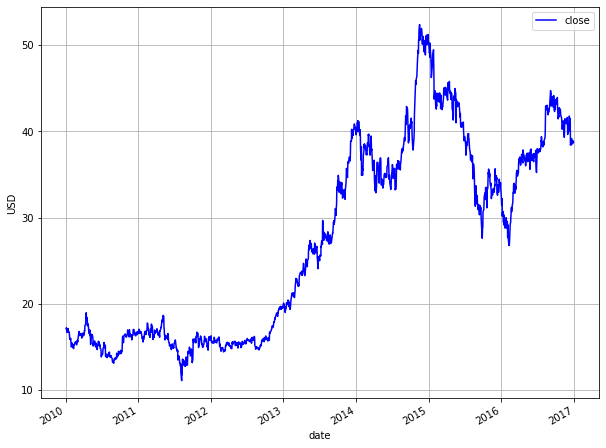

In [27]:
rcParams['figure.figsize'] = 10, 8 

ax = df.plot(x='date', y='close', style='b-', grid=True)
ax.set_xlabel("date")
ax.set_ylabel("USD")

Here we are displaying the sizes and shapes of our training, testing and validation datasets

In [ ]:
num_cv = int(cv_size*len(df))
num_test = int(test_size*len(df))
num_train = len(df) - num_cv - num_test
print("num_train = " + str(num_train))
print("num_cv = " + str(num_cv))
print("num_test = " + str(num_test))

train = df[:num_train].copy()
cv = df[num_train:num_train+num_cv].copy()
train_cv = df[:num_train+num_cv].copy()
test = df[num_train+num_cv:].copy()
print("train.shape = " + str(train.shape))
print("cv.shape = " + str(cv.shape))
print("train_cv.shape = " + str(train_cv.shape))
print("test.shape = " + str(test.shape))

Here we are using a graph to visualize the division of the dataset into the respective testing, training and validation datasets using multiple colours

In [ ]:
rcParams['figure.figsize'] = 10, 8

ax = train.plot(x='date', y='close', style='b-', grid=True)
ax = cv.plot(x='date', y='close', style='y-', grid=True, ax=ax)
ax = test.plot(x='date', y='close', style='g-', grid=True, ax=ax)
ax.legend(['train', 'dev', 'test'])
ax.set_xlabel("date")
ax.set_ylabel("USD")

Here we are converting our given range of values into RMSE(Root mean squared error), R2(R squared), MAPE(Mean absolute percentage error) in order to have more uniform range of values for the Linear Regression Model to function on

In [ ]:
RMSE = []
R2 = []
mape = []
for N in range(1, Nmax+1): # N is no. of samples to use to predict the next value
    est_list = get_preds_lin_reg(train_cv, 'adj_close', N, 0, num_train)
    
    cv.loc[:, 'est' + '_N' + str(N)] = est_list
    RMSE.append(math.sqrt(mean_squared_error(est_list, cv['close'])))
    R2.append(r2_score(cv['close'], est_list))
    mape.append(get_mape(cv['close'], est_list))
print('RMSE = ' + str(RMSE))
print('R2 = ' + str(R2))
print('MAPE = ' + str(mape))
cv.head()

Here we select the N valuee to get an optimal output, it is arbitrary and doesn't have any logic to selecting it's value, but 5 is being used a standard and can be changed in order to improve accuracy of the outputs

In [ ]:
# Set optimum N
N_opt = 5

Here we are using the N value selected to apply the Linear Regression model on n Days worth of historical data of the prices and predict the closing stock price on the (n+1)th day. Also we are representating this output in the form of a graph.

In [ ]:
day = pd.Timestamp(date(2020, 1, 19))
Nmax2 = 5
df_temp = cv[cv['date'] <= day]
plt.figure(figsize=(12, 8), dpi=80)
plt.plot(range(1,Nmax2+2), df_temp[-Nmax2-1:]['close'], 'bx-')
plt.plot(Nmax2+1, df_temp[-1:]['close'], 'ys-')
legend_list = ['close', 'actual_value']

# Plot the linear regression lines and the predictions
color_list = ['r', 'g', 'k', 'y', 'm', 'c', '0.75']
marker_list = ['x', 'x', 'x', 'x', 'x', 'x', 'x']
regr = LinearRegression(fit_intercept=True) # Create linear regression object
for N in range(5, Nmax2+1):
    # Plot the linear regression lines
    X_train = np.array(range(len(df_temp['close'][-N-1:-1]))) # e.g. [0 1 2 3 4]
    y_train = np.array(df_temp['close'][-N-1:-1]) # e.g. [2944 3088 3226 3335 3436]
    X_train = X_train.reshape(-1, 1)     
    y_train = y_train.reshape(-1, 1)
    regr.fit(X_train, y_train)            # Train the model
    y_est = regr.predict(X_train)         # Get linear regression line
    plt.plot(range(Nmax2+1-N,Nmax2+2), 
             np.concatenate((y_est, np.array(df_temp['est_N'+str(N)][-1:]).reshape(-1,1))),
             color=color_list[N%len(color_list)], 
             marker=marker_list[N%len(marker_list)])
    legend_list.append('est_N'+str(N)+'_lr')
    
    # Plot the predictions
    plt.plot(Nmax2+1, 
             df_temp['est_N'+str(N)][-1:], 
             color=color_list[N%len(color_list)], 
             marker='o')
    legend_list.append('est_N'+str(N))
    

plt.grid()
plt.xlabel('timestep')
plt.ylabel('USD')
plt.legend(legend_list, bbox_to_anchor=(1.05, 1))

Here we are visualizing the predicted values when we select N=1 and 5 along with our test,train and validation datasets

In [ ]:
rcParams['figure.figsize'] = 10, 8

ax = train.plot(x='date', y='close', style='b-', grid=True)
ax = cv.plot(x='date', y='close', style='y-', grid=True, ax=ax)
ax = test.plot(x='date', y='close', style='g-', grid=True, ax=ax)
ax = cv.plot(x='date', y='est_N1', style='r-', grid=True, ax=ax)
ax = cv.plot(x='date', y='est_N5', style='m-', grid=True, ax=ax)
ax.legend(['train', 'dev', 'test', 'predictions with N=1', 'predictions with N=5'])
ax.set_xlabel("date")
ax.set_ylabel("USD")

This is just a zoomed in representation of our valiation set with 2 N values

In [ ]:
rcParams['figure.figsize'] = 10, 8

ax = train.plot(x='date', y='close', style='bx-', grid=True)
ax = cv.plot(x='date', y='close', style='yx-', grid=True, ax=ax)
ax = test.plot(x='date', y='close', style='gx-', grid=True, ax=ax)
ax = cv.plot(x='date', y='est_N1', style='rx-', grid=True, ax=ax)
ax = cv.plot(x='date', y='est_N5', style='mx-', grid=True, ax=ax)
ax.legend(['train', 'dev', 'test', 'predictions with N=1', 'predictions with N=5'])
ax.set_xlabel("date")
ax.set_ylabel("USD")
ax.set_xlim([cv.date.min(), cv.date.max()])
ax.set_ylim([min, max])
ax.set_title('Zoom in to vd set')

These are some of the perfomance metrics to inform us about the accuracy of the outputs of the Linear Regression model

In [ ]:
est_list = get_preds_lin_reg(df, 'close', N_opt, 0, num_train+num_cv)
test.loc[:, 'est' + '_N' + str(N_opt)] = est_list
print("RMSE = %f" % math.sqrt(mean_squared_error(est_list, test['close'])))
print("R2 = %0.3f" % r2_score(test['close'], est_list))
print("MAPE = %0.3f%%" % get_mape(test['close'], est_list))
print("Variance Score:", r2_score(test['close'], est_list))
test.head()

In [ ]:
rcParams['figure.figsize'] = 10, 8

ax = train.plot(x='date', y='close', style='b-', grid=True)
ax = cv.plot(x='date', y='close', style='y-', grid=True, ax=ax)
ax = test.plot(x='date', y='close', style='g-', grid=True, ax=ax)
ax = test.plot(x='date', y='est_N5', style='r-', grid=True, ax=ax)
ax.legend(['train', 'dev', 'test', 'predictions with N_opt=5'])
ax.set_xlabel("date")
ax.set_ylabel("USD")

Here we are zooming in to our test set along with the predicted values

In [ ]:
rcParams['figure.figsize'] = 10, 8

ax = train.plot(x='date', y='close', style='bx-', grid=True)
ax = cv.plot(x='date', y='close', style='yx-', grid=True, ax=ax)
ax = test.plot(x='date', y='close', style='gx-', grid=True, ax=ax)
ax = test.plot(x='date', y='est_N5', style='rx-', grid=True, ax=ax)
ax.legend(['train', 'dev', 'test', 'predictions with N_opt=5'])
ax.set_xlabel("date")
ax.set_ylabel("USD")
ax.set_xlim([df.date.min(), df.date.max()])
ax.set_ylim([min, max])
ax.set_title('Zoom in to test set')

In [ ]:
rcParams['figure.figsize'] = 10, 8
matplotlib.rcParams.update({'font.size': 14})
ax = test.plot(x='date', y='close', style='gx-', grid=True)
ax = test.plot(x='date', y='est_N5', style='rx-', grid=True, ax=ax)
ax.legend(['test', 'predictions using linear regression'], loc='upper left')
ax.set_xlabel("date")
ax.set_ylabel("USD")
ax.set_xlim([test.date.min(), test.date.max()])
ax.set_ylim([min, max])

This is the ML algorithm that was implemented using Hadoop MapReduce to reduce dataset size and analyse big data related to stock market. Thank you.